# Image Analysis

In [403]:
# basic imports and notebook configurations
# standard Python modules
import logging
import os
import sys

# additional Python modules
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

# own python modules
from methods import *

# %aimport analyis
#importlib.reload(influx_db)
#importlib.reload(plot_tools)
plt.style.use('classic')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## logging configuration

In [404]:
logging.basicConfig(format='%(asctime)s %(levelname)s %(message)s', datefmt='%Y-%m-%d %H:%M:%S')
log = logging.getLogger(os.path.splitext(os.path.basename(sys.argv[0]))[0])
log.setLevel(logging.INFO)

### Development setup

2023-04-24 14:02:03,609 - INFO - methods.py - get_image_files - Found 128 images for case 0,5mmspacer0.5ml2
2023-04-24 14:02:03,610 - INFO - methods.py - make_histo - Already created histogramm for image 00000004_0000000042C80CED in folder png_cases
2023-04-24 14:02:03,651 - INFO - methods.py - segment_camera - Insta seed value: 238
2023-04-24 14:02:14,972 - INFO - methods.py - segment_camera - Cam final upper value 48
2023-04-24 14:02:15,050 - INFO - methods.py - segment_camera - Unique values cam [0 1]
2023-04-24 14:02:15,470 - INFO - methods.py - segment_instability - Insta seed value: 230
2023-04-24 14:02:15,748 - INFO - methods.py - segment_instability - Unique values insta [0 1]


UnboundLocalError: local variable 'ele' referenced before assignment

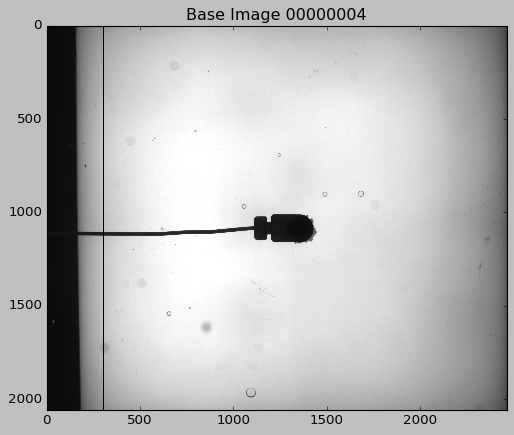

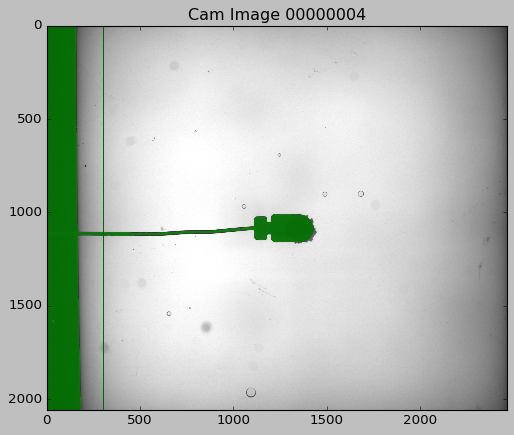

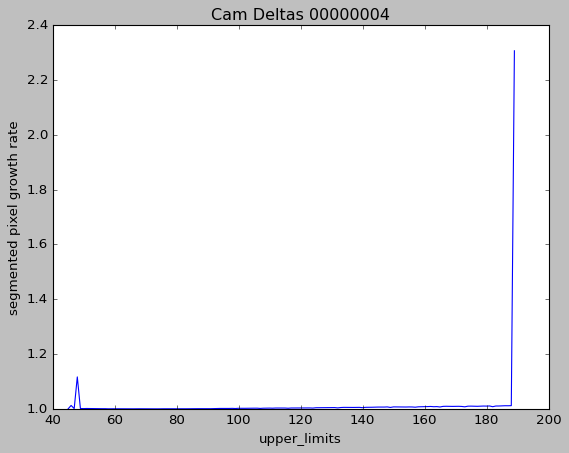

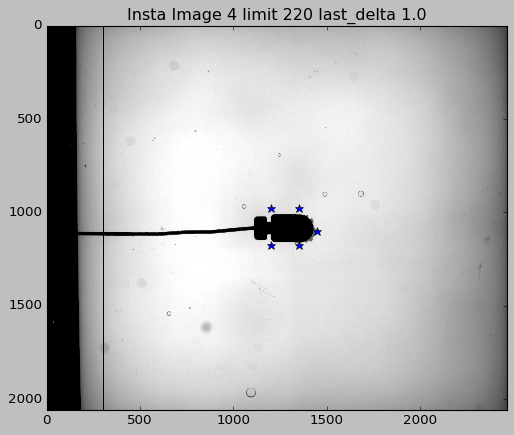

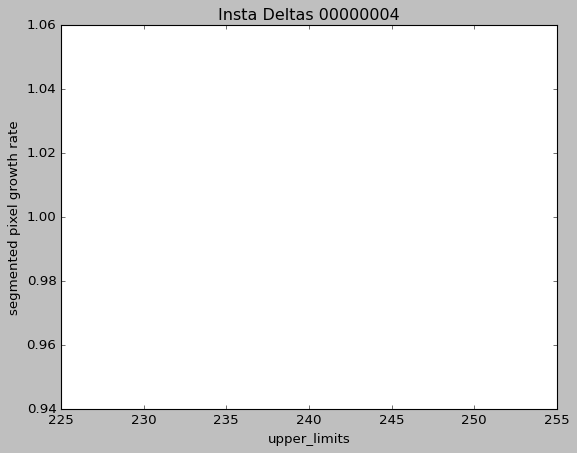

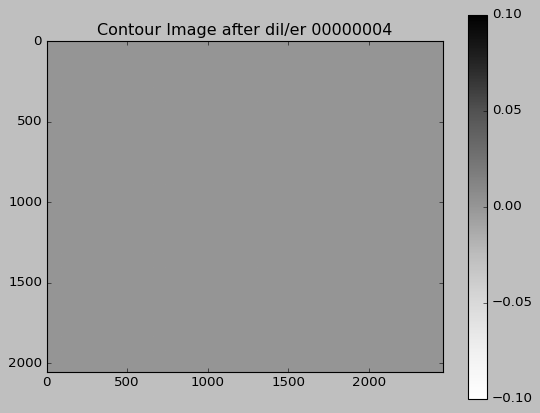

In [405]:
# read config
config = get_config()
# get dev case
cases = config["cases"]
# get image name
for cas in cases:
    images = get_image_files(config, cas, "png_cases")
    for img in images:
        process_image(img, config, cas)